# BatikSnap's Batik Pattern Image Classification

There are seven patterns to be recognized:

1.   Mega Mendung
2.   Sidoluhur
3.   Kawung
4.   Parang
5.   Tumpal
6.   Insang
7.   Truntum

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow as tf
from shutil import copyfile, rmtree
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocessing

## Load Data

In [4]:
%cd '/content/drive/My Drive/Capstone C23-PR498/ML'
!ls

/content/drive/My Drive/Capstone C23-PR498/ML
 batikimages		   BatikSnap_trial_3.ipynb  '[Tambahan] Rakha'
 BatikSnap_trial_1.ipynb   ModelingTrial
 BatikSnap_trial_2.ipynb  '[Tambahan] Marcia'


In [5]:
SOURCE_DIR = 'batikimages'
class_name = ["Mega mendung", "Sidoluhur", "Kawung", "Parang", "Tumpal", "Insang", "Truntum"]
for i in range(len(class_name)):
  print('Total gambar Batik ' + class_name[i] + ":", len(os.listdir(os.path.join(SOURCE_DIR, class_name[i]))))

Total gambar Batik Mega mendung: 320
Total gambar Batik Sidoluhur: 102
Total gambar Batik Kawung: 288
Total gambar Batik Parang: 269
Total gambar Batik Tumpal: 107
Total gambar Batik Insang: 138
Total gambar Batik Truntum: 212


## Randomize and Split Data

In [6]:
# Define root directory
root_dir = '/tmp/batikimages'
batik_name = ["Mega mendung", "Sidoluhur", "Kawung", "Parang", "Tumpal", "Insang", "Truntum"]

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  rmtree(root_dir)

def create_train_val_dirs(root_path):
  """
  Creates directories for the train and test sets
  
  Args:
    root_path (string) - the base directory path to create subdirectories from
  
  Returns:
    None
  """

  train_dirs = os.path.join(root_path, 'training')
  validation_dirs = os.path.join(root_path, 'validation')

  for batik in batik_name :
    os.makedirs(os.path.join(train_dirs, batik))
    os.makedirs(os.path.join(validation_dirs, batik))


In [7]:
# Create folders for storing the data
try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/batikimages/validation
/tmp/batikimages/training
/tmp/batikimages/validation/Kawung
/tmp/batikimages/validation/Parang
/tmp/batikimages/validation/Truntum
/tmp/batikimages/validation/Mega mendung
/tmp/batikimages/validation/Insang
/tmp/batikimages/validation/Sidoluhur
/tmp/batikimages/validation/Tumpal
/tmp/batikimages/training/Kawung
/tmp/batikimages/training/Parang
/tmp/batikimages/training/Truntum
/tmp/batikimages/training/Mega mendung
/tmp/batikimages/training/Insang
/tmp/batikimages/training/Sidoluhur
/tmp/batikimages/training/Tumpal


In [8]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE, SAMPLE_SIZE):
  """
  Splits the data into train and test sets
  
  Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training
    SAMPLE_SIZE (int): total amount of data to be splited
    
  Returns:
    None
  """
  source_files = []
  for f in os.listdir(SOURCE_DIR):
    if os.path.getsize(os.path.join(SOURCE_DIR,f)) > 0:
      source_files.append(f)
    else:
      print(f'{f} is zero length, so ignoring.')
    
  shuffled_files = random.sample(source_files, SAMPLE_SIZE)
  training_length = int(SPLIT_SIZE * len(shuffled_files))

  for train in shuffled_files[:training_length]:
    copyfile(os.path.join(SOURCE_DIR, train), os.path.join(TRAINING_DIR, train))
  
  for val in shuffled_files[training_length:]:
    copyfile(os.path.join(SOURCE_DIR, val), os.path.join(VALIDATION_DIR, val))

In [9]:
# Define paths
CLASS_SOURCE_LIST_DIR = [os.path.join(SOURCE_DIR, class_dir) for class_dir in os.listdir(SOURCE_DIR)]
print(f'CLASS_SOURCE_DIR : {CLASS_SOURCE_LIST_DIR}')

TRAINING_DIR = "/tmp/batikimages/training/"
TRAINING_LIST_DIR = [os.path.join(TRAINING_DIR, class_dir) for class_dir in os.listdir(SOURCE_DIR)]
print(f'TRAINING_LIST_DIR : {TRAINING_LIST_DIR}')

VALIDATION_DIR = "/tmp/batikimages/validation/"
VALIDATION_LIST_DIR = [os.path.join(VALIDATION_DIR, class_dir) for class_dir in os.listdir(SOURCE_DIR)]
print(f'VALIDATION_LIST_DIR : {VALIDATION_LIST_DIR}')

CLASS_SOURCE_DIR : ['batikimages/Mega mendung', 'batikimages/Insang', 'batikimages/Truntum', 'batikimages/Kawung', 'batikimages/Parang', 'batikimages/Tumpal', 'batikimages/Sidoluhur']
TRAINING_LIST_DIR : ['/tmp/batikimages/training/Mega mendung', '/tmp/batikimages/training/Insang', '/tmp/batikimages/training/Truntum', '/tmp/batikimages/training/Kawung', '/tmp/batikimages/training/Parang', '/tmp/batikimages/training/Tumpal', '/tmp/batikimages/training/Sidoluhur']
VALIDATION_LIST_DIR : ['/tmp/batikimages/validation/Mega mendung', '/tmp/batikimages/validation/Insang', '/tmp/batikimages/validation/Truntum', '/tmp/batikimages/validation/Kawung', '/tmp/batikimages/validation/Parang', '/tmp/batikimages/validation/Tumpal', '/tmp/batikimages/validation/Sidoluhur']


In [10]:
# SPLIT DATA

# Empty directories in case you run this cell multiple times
for temp in TRAINING_LIST_DIR:
  if len(os.listdir(temp)) > 0:
    for file in os.scandir(temp):
      os.remove(file.path)

for temp in VALIDATION_LIST_DIR:
  if len(os.listdir(temp)) > 0:
    for file in os.scandir(temp):
      os.remove(file.path)

# Define proportion of images used for training
SPLIT_SIZE = .8
# Define amount of total image to be loaded (train + validation)
SAMPLE_SIZE = 100

# Run the function
for i in range(len(CLASS_SOURCE_LIST_DIR)):
  split_data(CLASS_SOURCE_LIST_DIR[i], TRAINING_LIST_DIR[i], VALIDATION_LIST_DIR[i], SPLIT_SIZE, SAMPLE_SIZE)

  # Your function should perform copies rather than moving images so original directories should contain unchanged images
  print(f"\n\nOriginal Batik {os.listdir(SOURCE_DIR)[i]}'s directory has {len(os.listdir(CLASS_SOURCE_LIST_DIR[i]))} images")

  # Training and validation splits. Check that the number of images matches the expected output.
  print(f"There are {len(os.listdir(TRAINING_LIST_DIR[i]))} images of Batik {os.listdir(SOURCE_DIR)[i]} for training")
  print(f"There are {len(os.listdir(VALIDATION_LIST_DIR[i]))} images of Batik {os.listdir(SOURCE_DIR)[i]} for validation")



Original Batik Mega mendung's directory has 320 images
There are 80 images of Batik Mega mendung for training
There are 20 images of Batik Mega mendung for validation


Original Batik Insang's directory has 138 images
There are 80 images of Batik Insang for training
There are 20 images of Batik Insang for validation


Original Batik Truntum's directory has 212 images
There are 80 images of Batik Truntum for training
There are 20 images of Batik Truntum for validation


Original Batik Kawung's directory has 288 images
There are 80 images of Batik Kawung for training
There are 20 images of Batik Kawung for validation


Original Batik Parang's directory has 269 images
There are 80 images of Batik Parang for training
There are 20 images of Batik Parang for validation


Original Batik Tumpal's directory has 107 images
There are 80 images of Batik Tumpal for training
There are 20 images of Batik Tumpal for validation


Original Batik Sidoluhur's directory has 102 images
There are 80 images

# Creating the Generators for the CNN / Augmentation (?)

In [11]:
print(f"Flowing training data from {TRAINING_DIR}")
print(f"Flowing validation data from {VALIDATION_DIR}")
print()

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.25,
    zoom_range=0.25,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
    )

train_generator = train_datagen.flow_from_directory(
    directory=TRAINING_DIR,
    target_size=(224,224),
    class_mode='categorical',
    batch_size=32,
    color_mode='rgb'
)

val_datagen = ImageDataGenerator(
    rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    directory=VALIDATION_DIR,
    target_size=(224,224),
    class_mode='categorical',
    batch_size=32,
    color_mode='rgb'
)

Flowing training data from /tmp/batikimages/training/
Flowing validation data from /tmp/batikimages/validation/

Found 560 images belonging to 7 classes.
Found 140 images belonging to 7 classes.


# Coding the CNN (?)

In [12]:
def scheduler(epoch, lr):
  decay_rate = 0.1
  decay_step = 5
  if epoch % decay_step == 0:
    return lr * tf.math.exp(-decay_rate)
  else:
    return lr

lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [13]:
model = tf.keras.models.Sequential([
   tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224,224,3)),
   tf.keras.layers.MaxPooling2D(2,2),
   tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),
   tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),
   tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dropout(0.3),
   tf.keras.layers.Dense(210, activation='relu'),
   tf.keras.layers.Dense(7, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [14]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history = model.fit(train_generator, epochs=50, validation_data = val_generator, verbose = 1)

Epoch 1/50
18/18 [==============================] - 23s 555ms/step - loss: 1.9695 - accuracy: 0.1357 - val_loss: 1.9476 - val_accuracy: 0.1857
Epoch 2/50
18/18 [==============================] - 9s 510ms/step - loss: 1.9435 - accuracy: 0.1536 - val_loss: 1.9250 - val_accuracy: 0.1357
Epoch 3/50
18/18 [==============================] - 8s 436ms/step - loss: 1.9332 - accuracy: 0.1446 - val_loss: 1.9218 - val_accuracy: 0.2000
Epoch 4/50
18/18 [==============================] - 8s 453ms/step - loss: 1.8773 - accuracy: 0.2107 - val_loss: 1.8884 - val_accuracy: 0.2214
Epoch 5/50
18/18 [==============================] - 9s 510ms/step - loss: 1.8775 - accuracy: 0.1929 - val_loss: 1.9127 - val_accuracy: 0.2000
Epoch 6/50
18/18 [==============================] - 9s 473ms/step - loss: 1.8017 - accuracy: 0.2518 - val_loss: 1.9802 - val_accuracy: 0.1857
Epoch 7/50
18/18 [==============================] - 8s 454ms/step - loss: 1.7854 - accuracy: 0.2286 - val_loss: 1.7797 - val_accuracy: 0.3000
Epoch

# Plotting

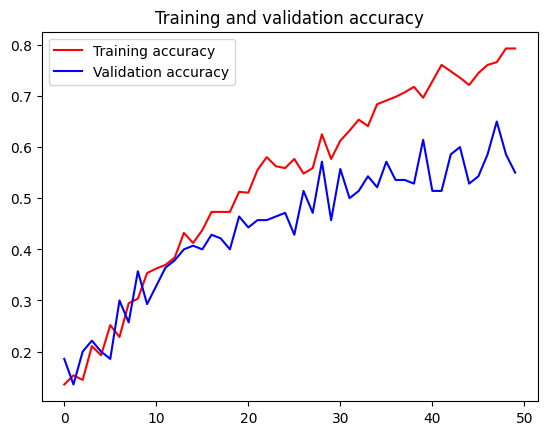

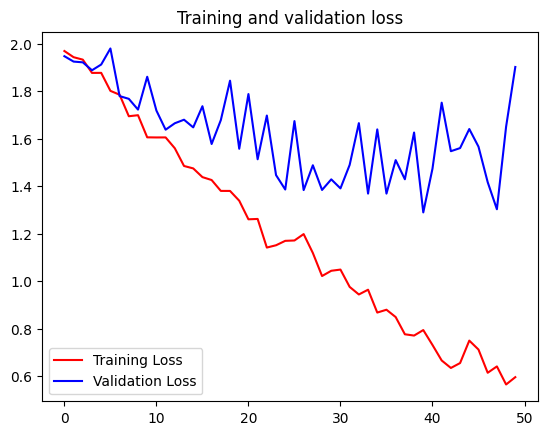

In [15]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Transfer Learning

In [16]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [17]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-05-31 05:49:40--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 172.253.115.128, 172.253.122.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   142MB/s    in 0.6s    

2023-05-31 05:49:41 (142 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [18]:
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

def create_pre_trained_model(local_weights_file):
  """
  Initializes an InceptionV3 model.
  
  Args:
    local_weights_file (string): path pointing to a pretrained weights H5 file
    
  Returns:
    pre_trained_model: the initialized InceptionV3 model
  """
  ### START CODE HERE
  pre_trained_model = InceptionV3(input_shape = (224, 224, 3),
                                  include_top = False, 
                                  weights = None) 

  pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  for layer in pre_trained_model.layers:
    layer.trainable=False

  ### END CODE HERE

  return pre_trained_model

In [19]:
# grader-required-cell
pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d_4[0][0]']               
 alization)                     )                                                      

In [20]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [21]:
def output_of_last_layer(pre_trained_model):
  """
  Gets the last layer output of a model
  
  Args:
    pre_trained_model (tf.keras Model): model to get the last layer output from
    
  Returns:
    last_output: output of the model's last layer 
  """
  ### START CODE HERE
  last_desired_layer = pre_trained_model.get_layer('mixed7')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)
  ### END CODE HERE

  return last_output

In [22]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 12, 12, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 12, 12, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [23]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

def create_final_model(pre_trained_model, last_output):
  """
  Appends a custom model to a pre-trained model
  
  Args:
    pre_trained_model (tf.keras Model): model that will accept the train/test inputs
    last_output (tensor): last layer output of the pre-trained model
    
  Returns:
    model: the combined model
  """
  # Flatten the output layer to 1 dimension
  x = layers.Flatten()(last_output)

  ### START CODE HERE
  x = layers.Dropout(0.2)(x)
  x = layers.Dense(64, activation='relu')(x)
  x = layers.Dropout(0.2)(x)    
  x = layers.Dense(32, activation='relu')(x)
  x = layers.Dense(7, activation='softmax')(x)         

  # Create the complete model by using the Model class
  model = Model(inputs=pre_trained_model.input, outputs=x)

  # Compile the model
  model.compile(optimizer = 'adam', 
                loss = "binary_crossentropy",
                metrics = ['accuracy'])

  ### END CODE HERE
  
  return model

In [24]:
model = create_final_model(pre_trained_model, last_output)

In [25]:
callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = val_generator,
                    epochs = 50,
                    verbose = 1,
                    callbacks=callbacks)

Epoch 1/50
18/18 [==============================] - 16s 552ms/step - loss: 0.5352 - accuracy: 0.2554 - val_loss: 0.3393 - val_accuracy: 0.5000
Epoch 2/50
18/18 [==============================] - 9s 512ms/step - loss: 0.2923 - accuracy: 0.6071 - val_loss: 0.2337 - val_accuracy: 0.7500
Epoch 3/50
18/18 [==============================] - 8s 443ms/step - loss: 0.2278 - accuracy: 0.7339 - val_loss: 0.1913 - val_accuracy: 0.7929
Epoch 4/50
18/18 [==============================] - 9s 509ms/step - loss: 0.1912 - accuracy: 0.7661 - val_loss: 0.1630 - val_accuracy: 0.8143
Epoch 5/50
18/18 [==============================] - 9s 514ms/step - loss: 0.1618 - accuracy: 0.8196 - val_loss: 0.1449 - val_accuracy: 0.8643
Epoch 6/50
18/18 [==============================] - 8s 432ms/step - loss: 0.1451 - accuracy: 0.8518 - val_loss: 0.1353 - val_accuracy: 0.8357
Epoch 7/50
18/18 [==============================] - 9s 515ms/step - loss: 0.1106 - accuracy: 0.8893 - val_loss: 0.1293 - val_accuracy: 0.8500
Epoch

In [26]:
for i, layer in enumerate(pre_trained_model.layers):
    print(i, layer.name)

0 input_1
1 conv2d_4
2 batch_normalization
3 activation
4 conv2d_5
5 batch_normalization_1
6 activation_1
7 conv2d_6
8 batch_normalization_2
9 activation_2
10 max_pooling2d_4
11 conv2d_7
12 batch_normalization_3
13 activation_3
14 conv2d_8
15 batch_normalization_4
16 activation_4
17 max_pooling2d_5
18 conv2d_12
19 batch_normalization_8
20 activation_8
21 conv2d_10
22 conv2d_13
23 batch_normalization_6
24 batch_normalization_9
25 activation_6
26 activation_9
27 average_pooling2d
28 conv2d_9
29 conv2d_11
30 conv2d_14
31 conv2d_15
32 batch_normalization_5
33 batch_normalization_7
34 batch_normalization_10
35 batch_normalization_11
36 activation_5
37 activation_7
38 activation_10
39 activation_11
40 mixed0
41 conv2d_19
42 batch_normalization_15
43 activation_15
44 conv2d_17
45 conv2d_20
46 batch_normalization_13
47 batch_normalization_16
48 activation_13
49 activation_16
50 average_pooling2d_1
51 conv2d_16
52 conv2d_18
53 conv2d_21
54 conv2d_22
55 batch_normalization_12
56 batch_normalizat

In [27]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 input_1
1 conv2d_4
2 batch_normalization
3 activation
4 conv2d_5
5 batch_normalization_1
6 activation_1
7 conv2d_6
8 batch_normalization_2
9 activation_2
10 max_pooling2d_4
11 conv2d_7
12 batch_normalization_3
13 activation_3
14 conv2d_8
15 batch_normalization_4
16 activation_4
17 max_pooling2d_5
18 conv2d_12
19 batch_normalization_8
20 activation_8
21 conv2d_10
22 conv2d_13
23 batch_normalization_6
24 batch_normalization_9
25 activation_6
26 activation_9
27 average_pooling2d
28 conv2d_9
29 conv2d_11
30 conv2d_14
31 conv2d_15
32 batch_normalization_5
33 batch_normalization_7
34 batch_normalization_10
35 batch_normalization_11
36 activation_5
37 activation_7
38 activation_10
39 activation_11
40 mixed0
41 conv2d_19
42 batch_normalization_15
43 activation_15
44 conv2d_17
45 conv2d_20
46 batch_normalization_13
47 batch_normalization_16
48 activation_13
49 activation_16
50 average_pooling2d_1
51 conv2d_16
52 conv2d_18
53 conv2d_21
54 conv2d_22
55 batch_normalization_12
56 batch_normalizat

In [28]:
from tensorflow.keras.optimizers import Adam

class MyThresholdCallback(tf.keras.callbacks.Callback):
  def __init__(self, threshold):
    super(MyThresholdCallback, self).__init__()
    self.threshold = threshold

  def on_epoch_end(self, epoch, logs=None): 
    val_accuracy = logs["val_accuracy"]
    train_accuracy = logs["accuracy"]
    if val_accuracy > self.threshold and train_accuracy > self.threshold:
      self.model.stop_training = True

callbacks = MyThresholdCallback(threshold=0.9)

for layer in model.layers[:200]:
    layer.trainable = False
for layer in model.layers[200:]:
    layer.trainable = True

#Fine tuning (nilai lr kecil)
optimizer = Adam(learning_rate=0.001)

#Recompile model hasil unfreeze
model.compile(optimizer=optimizer,
                 loss='categorical_crossentropy',
                 metrics = ['accuracy'])

#Ringkasan model hasil unfreeze
model.summary()

performa_tl = model.fit(train_generator,
                           callbacks = [callbacks],
                           epochs=50,
                           validation_data = val_generator,
                           verbose = 1)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d_4[0][0]']               
 alization)                     )                                                             